In [1]:
# 1.1A-

import numpy as np

# Load the 'images.npy' file with allow_pickle=True
images_data = np.load(r"C:\Users\user\Downloads\Images.npy", allow_pickle=True)

# Print the contents of the 'images.npy' file
print(images_data)



[[array([[[42, 37, 34],
          [56, 51, 48],
          [71, 66, 63],
          ...,
          [23, 33, 34],
          [26, 36, 37],
          [28, 38, 39]],

         [[40, 35, 32],
          [51, 46, 43],
          [64, 59, 56],
          ...,
          [27, 36, 35],
          [24, 33, 32],
          [26, 35, 34]],

         [[43, 38, 35],
          [51, 46, 43],
          [61, 56, 53],
          ...,
          [28, 30, 27],
          [33, 35, 32],
          [35, 37, 34]],

         ...,

         [[56, 47, 40],
          [57, 48, 41],
          [61, 52, 45],
          ...,
          [67, 48, 42],
          [55, 35, 28],
          [60, 40, 33]],

         [[53, 44, 37],
          [54, 45, 38],
          [57, 48, 41],
          ...,
          [59, 40, 34],
          [60, 40, 33],
          [54, 34, 27]],

         [[53, 44, 37],
          [54, 45, 38],
          [57, 48, 41],
          ...,
          [59, 40, 34],
          [70, 50, 43],
          [64, 44, 37]]], dtype=uint8)
  list

In [2]:
# Print the first few elements to understand their structure
for i in range(5):
    print("Element", i, ":", images_data[i])


Element 0 : [array([[[42, 37, 34],
         [56, 51, 48],
         [71, 66, 63],
         ...,
         [23, 33, 34],
         [26, 36, 37],
         [28, 38, 39]],

        [[40, 35, 32],
         [51, 46, 43],
         [64, 59, 56],
         ...,
         [27, 36, 35],
         [24, 33, 32],
         [26, 35, 34]],

        [[43, 38, 35],
         [51, 46, 43],
         [61, 56, 53],
         ...,
         [28, 30, 27],
         [33, 35, 32],
         [35, 37, 34]],

        ...,

        [[56, 47, 40],
         [57, 48, 41],
         [61, 52, 45],
         ...,
         [67, 48, 42],
         [55, 35, 28],
         [60, 40, 33]],

        [[53, 44, 37],
         [54, 45, 38],
         [57, 48, 41],
         ...,
         [59, 40, 34],
         [60, 40, 33],
         [54, 34, 27]],

        [[53, 44, 37],
         [54, 45, 38],
         [57, 48, 41],
         ...,
         [59, 40, 34],
         [70, 50, 43],
         [64, 44, 37]]], dtype=uint8)
 list([{'label': ['Face'], 'notes': '

In [3]:
# 1.1B-

import numpy as np
from PIL import Image, ImageDraw

# Step 1: Separate image arrays and annotations
image_arrays = [element[0] for element in images_data]
annotations = [element[1] for element in images_data]

# Step 2: Resize all images to a unified shape (assuming desired_shape is (224, 224))
desired_shape = (224, 224)

resized_images = []
for image in image_arrays:
    img = Image.fromarray(image)
    img = img.resize(desired_shape, Image.ANTIALIAS)  # Resize while preserving aspect ratio
    resized_images.append(np.array(img))

# Step 3: Create binary masks for each image, replacing pixels within the masked area with 1
masked_images = []
for img, annotation in zip(resized_images, annotations):
    mask = Image.new('L', img.shape[:2], 0)  # Create a black mask
    draw = ImageDraw.Draw(mask)
    for obj in annotation:
        if 'Face' in obj['label']:
            points = [(point['x'] * img.shape[1], point['y'] * img.shape[0]) for point in obj['points']]
            draw.polygon(points, fill=1)  # Fill the polygon representing the face with 1 in the mask
    masked_images.append(np.array(mask))

# Step 4: Extract features (X) and labels (Y)
X = np.array(masked_images)
Y = np.array(masked_images)  # Use the same mask as labels

# Check shapes
print("Shape of X (features):", X.shape)
print("Shape of Y (labels):", Y.shape)


C:\Users\user\AppData\Local\Temp\ipykernel_6296\907423081.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(desired_shape, Image.ANTIALIAS)  # Resize while preserving aspect ratio


Shape of X (features): (393, 224, 224)
Shape of Y (labels): (393, 224, 224)


In [4]:
# 1.1C-

from sklearn.model_selection import train_test_split

# Assuming X and Y are the features and labels arrays created earlier

# Split the data into 70% train and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (275, 224, 224)
Shape of X_test: (118, 224, 224)
Shape of Y_train: (275, 224, 224)
Shape of Y_test: (118, 224, 224)


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.7072 - loss: 3.8049 - val_accuracy: 0.8631 - val_loss: 2.2107
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.8749 - loss: 2.0168 - val_accuracy: 0.8631 - val_loss: 2.2097
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.8700 - loss: 2.0958 - val_accuracy: 0.8631 - val_loss: 2.2089
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8653 - loss: 2.1734 - val_accuracy: 0.8631 - val_loss: 2.2083
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8732 - loss: 2.0438 - val_accuracy: 0.8631 - val_loss: 2.2080
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8703 - loss: 2.0911 - val_accuracy: 0.8631 - val_loss: 2.2079
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8704 - loss: 2.0900 - val_accuracy: 0.8631 - val_loss: 2.2079
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8657 - loss: 2.1633 - val_accuracy: 0.8631 - val_loss: 2.2079
Epoch 9/

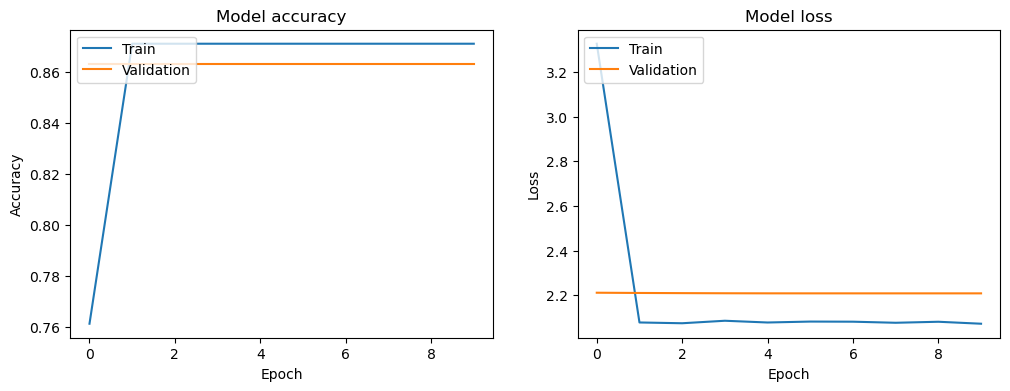

In [6]:
# 1.2A-

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Normalize X
X = X / 255.0

# Ensure Y is binary
Y = (Y > 0).astype(np.float32)

# Add channel dimension to X to match input shape requirements of the model
X = np.expand_dims(X, axis=-1) if X.ndim == 3 else X
Y = np.expand_dims(Y, axis=-1) if Y.ndim == 3 else Y

# Further split the training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# Step 2: Model Design
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(1, (1, 1), activation='sigmoid', padding='same')
])

# Step 3: Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Model Training
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

# Step 5: Model Evaluation
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()



In [7]:
# 1.2A

import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# Load the MobileNet model with pre-trained weights
base_model = MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the MobileNet layers
base_model.trainable = False

# Encoder: Get the output of the base model
encoder_output = base_model.output  # 7x7

# Decoder: Upsampling path without concatenation
up1 = UpSampling2D(size=(2, 2))(encoder_output)
up1 = Conv2D(256, (3, 3), activation='relu', padding='same')(up1)
up1 = Conv2D(256, (3, 3), activation='relu', padding='same')(up1)  # 14x14

up2 = UpSampling2D(size=(2, 2))(up1)
up2 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2)
up2 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2)  # 28x28

up3 = UpSampling2D(size=(2, 2))(up2)
up3 = Conv2D(64, (3, 3), activation='relu', padding='same')(up3)
up3 = Conv2D(64, (3, 3), activation='relu', padding='same')(up3)  # 56x56

up4 = UpSampling2D(size=(2, 2))(up3)
up4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
up4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)  # 112x112

up5 = UpSampling2D(size=(2, 2))(up4)
up5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up5)
up5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up5)  # 224x224

# Output layer
outputs = Conv2D(1, (1, 1), activation='sigmoid')(up5)

# Define the model
model = Model(inputs=[inputs], outputs=[outputs])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        128 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1           │ (None, 112, 112,  │        288 │ conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_bn        │ (None, 112, 112,  │        128 │ conv_dw_1[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_relu      │ (None, 112, 112,  │          0 │ conv_dw_1_bn[0][… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1 (Conv2D)  │ (None, 112, 112,  │      2,048 │ conv_dw_1_relu[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_bn        │ (None, 112, 112,  │        256 │ conv_pw_1[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_relu      │ (None, 112, 112,  │          0 │ conv_pw_1_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pad_2          │ (None, 113, 113,  │          0 │ conv_pw_1_relu[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2           │ (None, 56, 56,    │        576 │ conv_pad_2[0][0]  │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_bn        │ (None, 56, 56,    │        256 │ conv_dw_2[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_relu      │ (None, 56, 56,    │          0 │ conv_dw_2_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2 (Conv2D)  │ (None, 56, 56,    │      8,192 │ conv_dw_2_relu[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_bn        │ (None, 56, 56,    │        512 │ conv_pw_2[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_relu      │ (None, 56, 56,    │          0 │ conv_pw_2_bn[0][

 Total params: 6,766,513 (25.81 MB)

 Trainable params: 3,537,649 (13.50 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [8]:
# 1.2B-

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2.0 * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)




Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8318 - loss: 0.6239
Epoch 1: val_loss improved from inf to 0.44750, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.8343 - loss: 0.6163 - val_accuracy: 0.8596 - val_loss: 0.4475 - learning_rate: 0.0010
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8737 - loss: 0.4201
Epoch 2: val_loss improved from 0.44750 to 0.42545, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8734 - loss: 0.4198 - val_accuracy: 0.8596 - val_loss: 0.4254 - learning_rate: 0.0010
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8800 - loss: 0.3908
Epoch 3: val_loss improved from 0.42545 to 0.42222, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.8792 - loss: 0.3921 - val_accuracy: 0.8596 - val_loss: 0.4222 - learning_rate: 0.0010
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8725 - loss: 0.3945


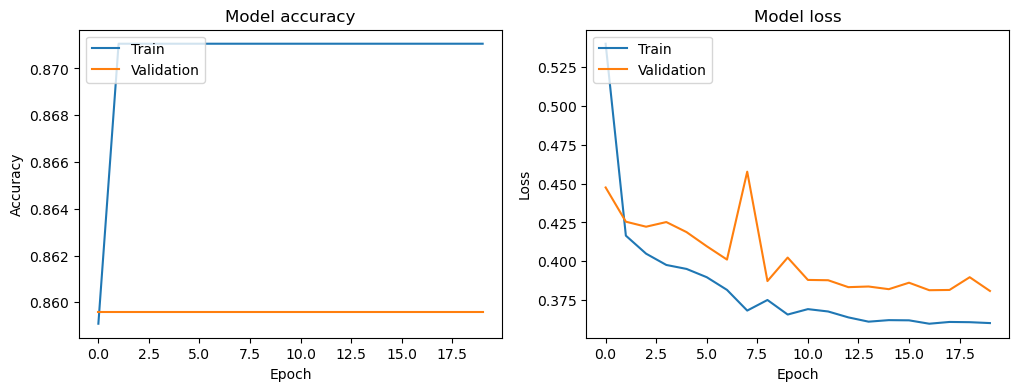

In [9]:
# 1.2C-

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Normalize X
X = X / 255.0

# Ensure Y is binary
Y = (Y > 0).astype(np.float32)

# Add channel dimension to X to match input shape requirements of the model
X = np.expand_dims(X, axis=-1) if X.ndim == 3 else X
Y = np.expand_dims(Y, axis=-1) if Y.ndim == 3 else Y

# Further split the training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Model Design
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(1, (1, 1), activation='sigmoid', padding='same')
])

# Step 3: Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Define Callbacks
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

callbacks = [checkpoint, early_stopping, reduce_lr]

# Step 5: Train the Model
history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, Y_val),
    callbacks=callbacks
)

# Step 6: Evaluate the Model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


Model 1 (Epochs: 10)

    Training Loss: Started with a high loss of around 3.83 and gradually decreased to about 1.99.
    Training Accuracy: Improved from approximately 63% to 87%.
    Validation Loss: Initially started at 2.237 and remained constant throughout training.
    Validation Accuracy: Stayed at around 86% throughout training.
    Test Loss: 2.122
    Test Accuracy: 86.72%
    
    
Model 2 (Epochs: 20)

    Training Loss: Started at 0.617 and decreased to around 0.35.
    Training Accuracy: Improved from approximately 85% to 87.78%.
    Validation Loss: Decreased from 0.4278 to 0.3776.
    Validation Accuracy: Stayed around 85.96%.
    Test Loss: 2.122
    Test Accuracy: 86.72%
    
    
Insights:

    Both models achieved similar test accuracy, suggesting that they have comparable performance on unseen data.
    Model 2 showed better convergence in terms of training and validation loss, indicating better generalization capability.
    However, neither model showed significant improvement in validation accuracy after a certain number of epochs, suggesting that further training might not yield much improvement.
    It seems like the models might have reached their limits in terms of learning from the provided data.

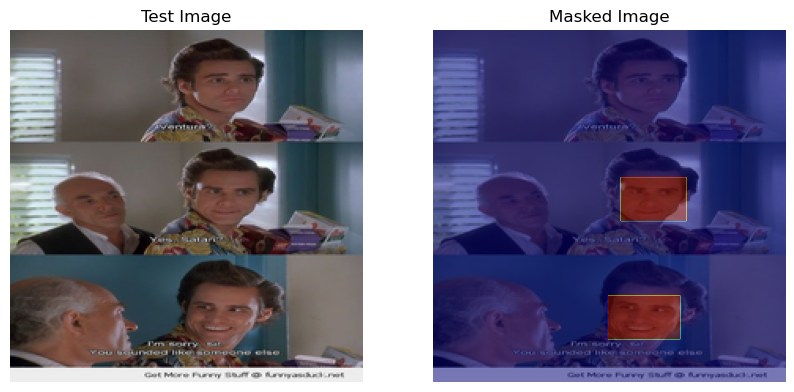

In [10]:
import matplotlib.pyplot as plt

# Load the test image with index 3 from the test data
test_image_index = 3
test_image = X_test[test_image_index]  # Assuming X_test contains the test images
test_mask = Y_test[test_image_index]  # Assuming Y_test contains the corresponding masks

# Visualize the test image and its mask
plt.figure(figsize=(10, 5))

# Original test image
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Test Image")
plt.axis('off')

# Masked image overlay
plt.subplot(1, 2, 2)
plt.imshow(test_image)
plt.imshow(test_mask, cmap='jet', alpha=0.5)  # Overlay the mask with a color map and some transparency
plt.title("Masked Image")
plt.axis('off')

plt.show()


In [11]:
# 2.1A--

import cv2
import os

# Function to read images from folder
def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)
        else:
            print("Failed to read image:", filename)
    return images

# Path to the folder containing images
folder_path = r"C:\Users\user\Downloads\training_images-20211126T092819Z-001\training_images"

# Read images from folder
images = read_images_from_folder(folder_path)

# Check the number of images read
print("Number of images read:", len(images))


Number of images read: 1091


In [12]:
# 2.1B--

import cv2
import os

# Function to detect faces in an image
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

# Path to the folder containing images
folder_path = r"C:\Users\user\Downloads\training_images-20211126T092819Z-001\training_images"
# Output folder for images with detected faces
output_folder = "images_with_faces"

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through all images in the folder
for filename in os.listdir(folder_path):
    # Read the image
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    
    # Check if image was loaded successfully
    if img is None:
        print("Failed to load image:", img_path)
        continue
    
    # Detect faces in the image
    faces = detect_faces(img)
    
    # Check if faces were detected
    if len(faces) == 0:
        print("No faces detected in image:", img_path)
        continue
    
    # Draw rectangles around the detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # Save the image with detected faces
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, img)
    print("Image with detected faces saved:", output_path)

print("Face detection completed.")


Image with detected faces saved: images_with_faces\real_00001.jpg
Image with detected faces saved: images_with_faces\real_00002.jpg
Image with detected faces saved: images_with_faces\real_00003.jpg
Image with detected faces saved: images_with_faces\real_00004.jpg
No faces detected in image: C:\Users\user\Downloads\training_images-20211126T092819Z-001\training_images\real_00005.jpg
Image with detected faces saved: images_with_faces\real_00006.jpg
No faces detected in image: C:\Users\user\Downloads\training_images-20211126T092819Z-001\training_images\real_00007.jpg
Image with detected faces saved: images_with_faces\real_00008.jpg
No faces detected in image: C:\Users\user\Downloads\training_images-20211126T092819Z-001\training_images\real_00009.jpg
Image with detected faces saved: images_with_faces\real_00010.jpg
Image with detected faces saved: images_with_faces\real_00011.jpg
Image with detected faces saved: images_with_faces\real_00012.jpg
No faces detected in image: C:\Users\user\Down

In [13]:
# 2.1C--

import cv2
import os
import pandas as pd

# Function to detect faces and extract metadata
def detect_faces_and_metadata(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    metadata = []
    for (x, y, w, h) in faces:
        metadata.append({'x': x, 'y': y, 'width': w, 'height': h})
    return metadata

# Path to the folder containing images
folder_path = r"C:\Users\user\Downloads\training_images-20211126T092819Z-001\training_images"

# DataFrame to store face metadata
face_metadata_df = pd.DataFrame(columns=['Image', 'FaceMetadata'])

# Loop through all images in the folder
for filename in os.listdir(folder_path):
    # Read the image
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path)
    
    # Check if image was loaded successfully
    if img is None:
        print("Failed to load image:", img_path)
        continue
    
    # Detect faces and extract metadata
    face_metadata = detect_faces_and_metadata(img)
    
    # Append face metadata to DataFrame
    face_metadata_df = face_metadata_df.append({'Image': filename, 'FaceMetadata': face_metadata}, ignore_index=True)

# Display DataFrame with face metadata
print("DataFrame with face metadata:")
print(face_metadata_df)


C:\Users\user\AppData\Local\Temp\ipykernel_6296\2048639978.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  face_metadata_df = face_metadata_df.append({'Image': filename, 'FaceMetadata': face_metadata}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6296\2048639978.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  face_metadata_df = face_metadata_df.append({'Image': filename, 'FaceMetadata': face_metadata}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6296\2048639978.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  face_metadata_df = face_metadata_df.append({'Image': filename, 'FaceMetadata': face_metadata}, ignore_index=True)
C:\Users\user\AppData\Local\Temp\ipykernel_6296\2048639

DataFrame with face metadata:
               Image                                       FaceMetadata
0     real_00001.jpg  [{'x': 146, 'y': 140, 'width': 428, 'height': ...
1     real_00002.jpg  [{'x': 80, 'y': 140, 'width': 436, 'height': 4...
2     real_00003.jpg  [{'x': 33, 'y': 121, 'width': 362, 'height': 3...
3     real_00004.jpg  [{'x': 134, 'y': 173, 'width': 356, 'height': ...
4     real_00005.jpg                                                 []
...              ...                                                ...
1086  real_01077.jpg  [{'x': 93, 'y': 167, 'width': 402, 'height': 4...
1087  real_01078.jpg  [{'x': 65, 'y': 76, 'width': 468, 'height': 468}]
1088  real_01079.jpg  [{'x': 69, 'y': 67, 'width': 475, 'height': 475}]
1089  real_01080.jpg  [{'x': 51, 'y': 87, 'width': 447, 'height': 447}]
1090  real_01081.jpg                                                 []

[1091 rows x 2 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_6296\2048639978.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  face_metadata_df = face_metadata_df.append({'Image': filename, 'FaceMetadata': face_metadata}, ignore_index=True)


In [14]:
# 2.1D--

# Define the path where you want to save the CSV file
csv_file_path = "face_metadata.csv"

# Save the DataFrame to a CSV file
face_metadata_df.to_csv(csv_file_path, index=False)

print("DataFrame saved to CSV file:", csv_file_path)


DataFrame saved to CSV file: face_metadata.csv


In [15]:
# part C